# Практическая работа № 1

Валерий Сергеевич Верхотуров
БСБО-05-20

In [1]:
from IPython.core.display_functions import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1

Создать функцию, реализующую мультипликативный метод генерации последовательности случайных чисел со следующими параметрами: $a = 22695477,\,b = 1,\,m = 2^{32}$.

In [2]:
# multiplicative method for generating random numbers
def multiplicative_method(a = 22_695_477, b = 1, m = 2 ** 64 - 1, x = 0):
    while True:
        if m > 2 ** 32:
            m = m % 2 ** 32
        else:
            break
    assert 0 <= a < m
    assert 0 <= b < m
    assert m >= 2
    assert 0 <= x < m
    while True:
        x = (a * x + b) % m
        yield x / m

## Задание 2

Сгенерировать с помощью функции, реализующей мультипликативный метод, равномерно распределенные последовательности случайных чисел в интервале от $A = 0$ до $B = 10$ длинной $N = 10^2, 10^3, 10^4, 10^5$. В качестве начального значения для генератора использовать $X_0 = 1$.

In [3]:
def task_2():
    N = [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5]
    A = 0
    B = 10
    X_0 = 1

    df = pd.DataFrame(index=range(max(N)))
    multiplicative_generator = multiplicative_method(x = X_0)
    for n in N:
        df[n] = pd.Series(
            map(
                lambda x: (B - A) * x + A,
                [next(multiplicative_generator) for _ in range(n)]),
            name=n)
    display(df.head())
    df.to_csv("task 2.csv", mode="w+")
task_2()

,100,1000,10000,100000
0,0.052842,2.286569,0.513570,3.747002
1,5.020214,3.698231,7.582951,1.821769
2,3.887881,8.546186,8.073215,3.286902
3,0.422562,1.105707,3.060830,8.825199
4,7.115508,3.069225,7.774856,8.193695


## Задание 3

Рассчитать для сгенерированных последовательностей математическое ожидание и дисперсию. Сравнить полученные значения с математическим ожиданием и дисперсией теоретической равномерно распределенной случайной величины.

In [4]:
def task_3():
    df = pd.read_csv("task 2.csv")
    for column in df.columns[1:]:
        print(f"Expected value for n = {df[column].name}: {df[column].mean()}")
        print(f"Dispersion for n = {df[column].name}: {df[column].std()}\n")

task_3()

Expected value for n = 100: 4.959844905757309
Dispersion for n = 100: 2.8204367270096316

Expected value for n = 1000: 4.980581583229495
Dispersion for n = 1000: 2.910508327509599

Expected value for n = 10000: 4.9729328728916435
Dispersion for n = 10000: 2.883707178435099

Expected value for n = 100000: 4.99987930629388
Dispersion for n = 100000: 2.8848267159950556



Математическое ожидание теоретической равномерно распределенной величины:
$$M[X]=\frac{a + b}{2} = \frac{0 + 10}{2} = 5$$

Дисперсия теоретической равномерно распределенной величины:
$$D[X]=\frac{b - a}{12} = \frac{10 - 0}{12} = \frac{5}{6}$$

## Задание 4

Определить период сгенерированной последовательности случайных чисел.

In [5]:
def task_4():
    multiplicative_generator = multiplicative_method(x = 1)
    numbers = [next(multiplicative_generator) for _ in range(10 ** 4)]
    for index_1, number_1 in enumerate(numbers):
        for index_2, number_2 in enumerate(numbers[index_1 + 1:]):
            if number_1 == number_2:
                print(f"The period is {index_2 - index_1}")
                return index_2 - index_1
    return -1

print("Result:", task_4())

Result: -1


Период для первых $10^4$ чисел не найден.

## Задание 5

Реализовать функцию определения относительных частот случайных чисел о известной выборке. Входными параметрами должны быть: выборка случайных чисел, заданные левая и правая граница выборки, количество участков. Выходным параметром — относительные частоты для заданных участков.

In [6]:
# frequency of random numbers of a known sample
def task_5(series_of_random_numbers, left_border, right_border, number_of_sections):
    series_of_random_numbers = series_of_random_numbers.dropna()

    step = (right_border - left_border) / number_of_sections
    rng = np.arange(left_border, right_border + 1, step)
    plt.hist(series_of_random_numbers,
             bins = rng,
             weights = np.ones_like(series_of_random_numbers) /
                       len(series_of_random_numbers))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f"Bar chart for {series_of_random_numbers.name} pseudorandom numbers")
    plt.grid(True)
    plt.show()

    series_of_random_numbers_length = len(series_of_random_numbers)
    relative_frequencies = series_of_random_numbers\
        .apply(lambda numb: numb / (series_of_random_numbers_length * step))
    theoretical_frequency = 1 / number_of_sections
    print("Pearson's criterion for bar chart above:",
          sum((theoretical_frequency - freq) ** 2 / freq
              for freq in relative_frequencies))

## Задание 6

Построить гистограммы относительных частот для получения последовательностей случайных чисел на 10 участках, рассчитать для них значение критерия Пирсона.

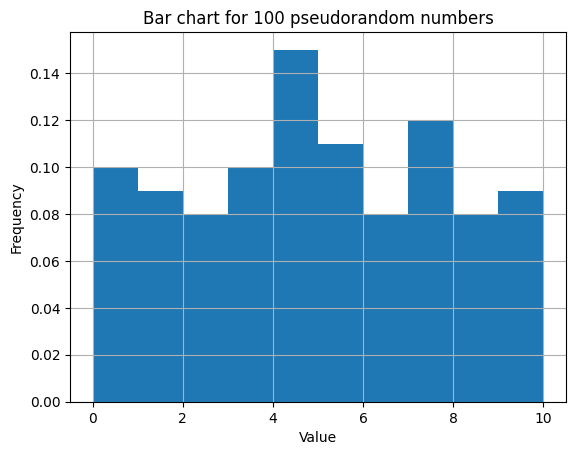

Pearson's criterion for bar chart above: 89.84437431195225


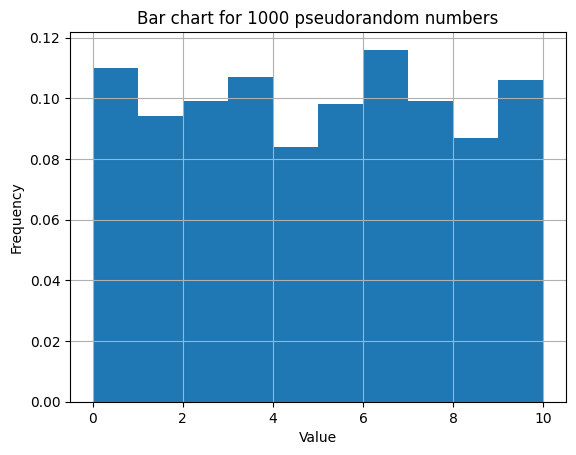

Pearson's criterion for bar chart above: 10604.234880407583


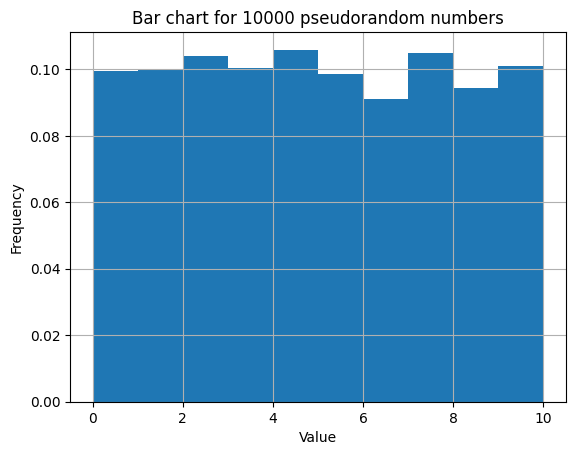

Pearson's criterion for bar chart above: 4326682.650471795


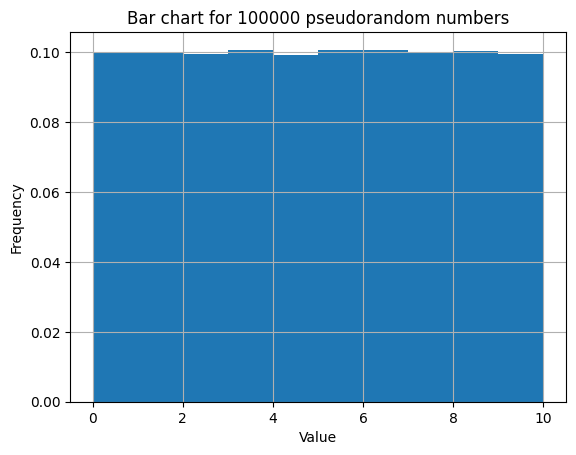

Pearson's criterion for bar chart above: 111465657.04697159


In [7]:
def task_6():
    LEFT_BORDER = 0
    RIGHT_BORDER = 10
    NUMBER_OF_SECTIONS = 10

    df = pd.read_csv("task 2.csv")

    for series_name in df.columns[1:]:
        task_5(df[series_name], LEFT_BORDER, RIGHT_BORDER, NUMBER_OF_SECTIONS)

task_6()

## Задание 7

Сравнение с функцией [random.uniform](https://docs.python.org/3/library/random.html#random.uniform), функцией [numpy.random.random_sample](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html#numpy.random.random_sample) для генерации псевдослучайных чисел.

random.uniform


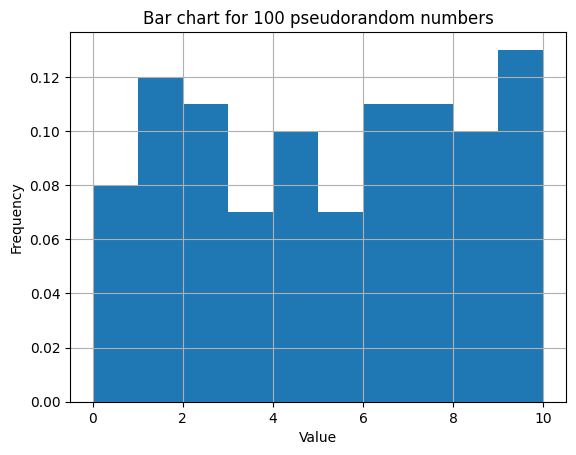

Pearson's criterion for bar chart above: 30.825740575861474


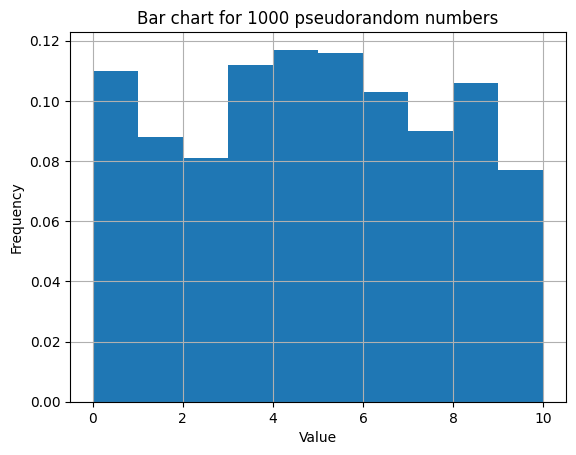

Pearson's criterion for bar chart above: 8416.38322755736


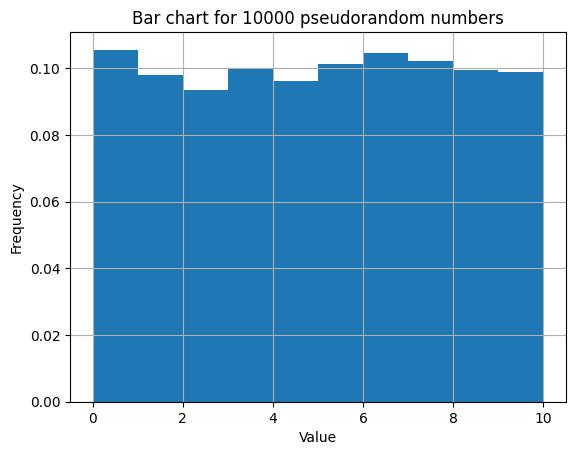

Pearson's criterion for bar chart above: 850495.3572559236


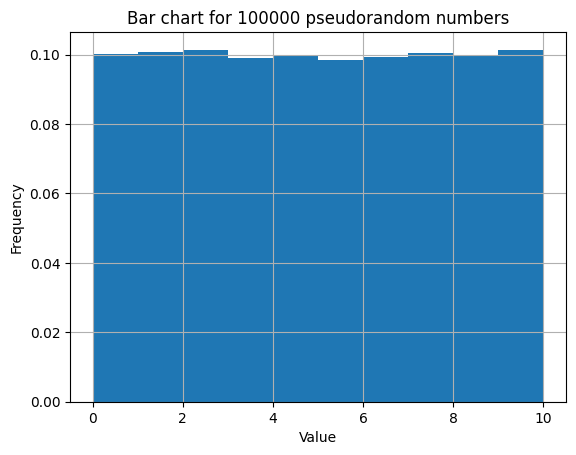

Pearson's criterion for bar chart above: 118924626.32260306
numpy.random.random_sample


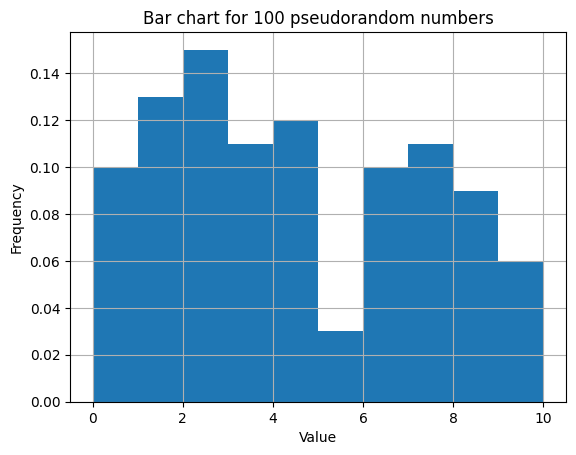

Pearson's criterion for bar chart above: 36.53013838180666


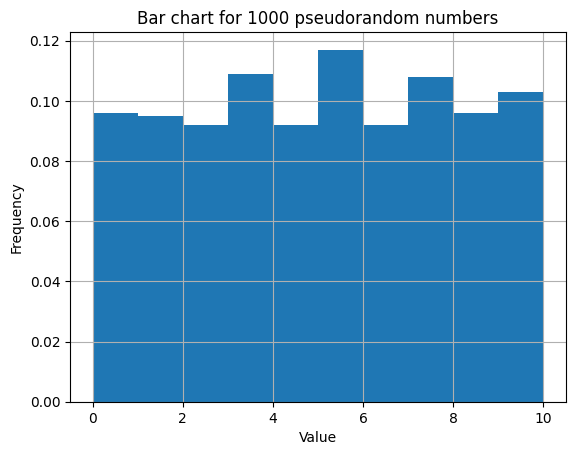

Pearson's criterion for bar chart above: 5673.790550496108


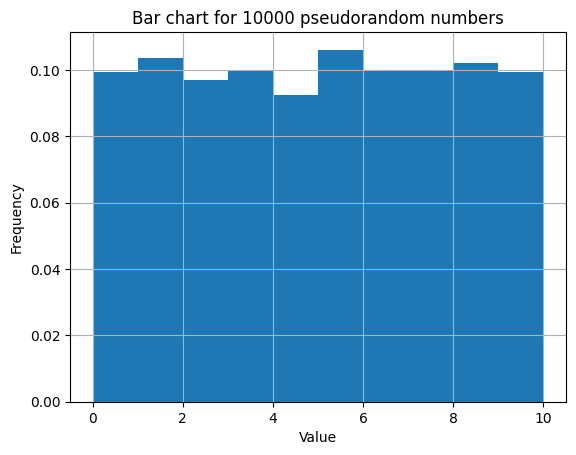

Pearson's criterion for bar chart above: 2000918.6669109438


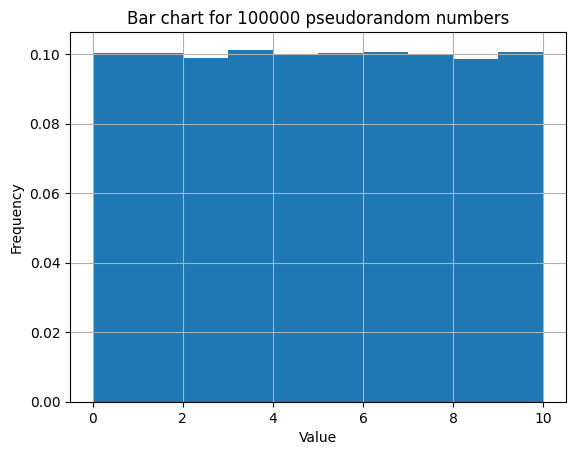

Pearson's criterion for bar chart above: 151653426.81985173


In [8]:
def task_7():
    from random import uniform
    from numpy.random import random_sample
    LEFT_BORDER = 0
    RIGHT_BORDER = 10
    NUMBER_OF_SECTIONS = 10
    N = [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5]

    print("random.uniform")
    for n in N:
        task_5(pd.Series([uniform(LEFT_BORDER, RIGHT_BORDER) for _ in range(n)], name=n),
               LEFT_BORDER,
               RIGHT_BORDER,
               NUMBER_OF_SECTIONS)

    print("numpy.random.random_sample")
    for n in N:
        task_5(pd.Series(
                [random_sample() * (RIGHT_BORDER - LEFT_BORDER) + LEFT_BORDER
                 for _ in range(n)],
                name=n),
            LEFT_BORDER,
            RIGHT_BORDER,
            NUMBER_OF_SECTIONS)

task_7()

## Вывод

Проведен анализ мультипликативного метода генерации случайных чисел. Функции генерации псевдослучайных чисел из стандартной библиотеки Python и NumPy похожи по выдаваемому результату.